<a href="https://colab.research.google.com/github/Manish-ux-blip/MANISH.L/blob/main/Untitled13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the Deep Neural Network
class DeepNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(DeepNeuralNetwork, self).__init__()

        # Define layers
        self.hidden1 = nn.Linear(input_size, hidden_sizes[0])
        self.hidden2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.hidden3 = nn.Linear(hidden_sizes[1], hidden_sizes[2])
        self.output = nn.Linear(hidden_sizes[2], output_size)
        self.output_size = output_size

        # Activation
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.dropout(self.relu(self.hidden1(x)))
        #x = self.relu(self.hidden1(x))
        x = self.relu(self.hidden2(x))
        x = self.relu(self.hidden3(x))
        x = self.output(x)
        x= self.softmax(x) # Use Sigmoid for regression; change as needed
        return x


In [4]:
input_size = 30      # Number of input features
hidden_sizes = [16, 8, 8]
output_size = 2      # For regression; use different for classification

# Create the model
model = DeepNeuralNetwork(input_size, hidden_sizes, output_size)

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the Deep Neural Network
class DeepNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(DeepNeuralNetwork, self).__init__()

        # Define layers
        self.hidden1 = nn.Linear(input_size, hidden_sizes[0])
        self.hidden2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.hidden3 = nn.Linear(hidden_sizes[1], hidden_sizes[2])
        self.output = nn.Linear(hidden_sizes[2], output_size)
        self.output_size = output_size

        # Activation
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.dropout(self.relu(self.hidden1(x)))
        #x = self.relu(self.hidden1(x))
        x = self.relu(self.hidden2(x))
        x = self.relu(self.hidden3(x))
        x = self.output(x)
        x= self.softmax(x) # Use Sigmoid for regression; change as needed
        return x

# Parameters
input_size = 30      # Number of input features
hidden_sizes = [16, 8, 8]
output_size = 2      # For regression; use different for classification

# Create the model
model = DeepNeuralNetwork(input_size, hidden_sizes, output_size)

In [6]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# [A] Load and preprocess real data
df = pd.read_csv("week3_data.csv")  # Kaggle breast cancer dataset
df = df.drop(columns=["id", "Unnamed: 32"], errors="ignore")
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int)  # Map malignant to 1, benign to 0

X = df.drop(columns=["diagnosis"]).values
y = df['diagnosis'].values.reshape(-1,1)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Convert NumPy arrays to torch tensors
x = torch.tensor(X_train, dtype=torch.float32)
y = torch.tensor(y_train.squeeze(), dtype=torch.long)  # Labels for CrossEntropyLoss

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_values = []
accuracy_values = []
# Training loop
for epoch in range(50):
    optimizer.zero_grad()

    output = model(x)                 # shape: [batch_size, num_classes]
    loss = criterion(output, y)      # y must be shape: [batch_size]

    loss.backward()
    optimizer.step()

    # Calculate accuracy
    preds = torch.argmax(output, dim=1)
    correct = (preds == y).sum().item()
    accuracy = correct / y.size(0)
    loss_values.append(loss.item())
    accuracy_values.append(accuracy)

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}, Accuracy: {accuracy*100:.2f}%")

Epoch 0, Loss: 0.6988, Accuracy: 37.36%
Epoch 10, Loss: 0.4848, Accuracy: 94.51%
Epoch 20, Loss: 0.3525, Accuracy: 96.70%
Epoch 30, Loss: 0.3349, Accuracy: 98.02%
Epoch 40, Loss: 0.3326, Accuracy: 98.24%


In [12]:
model.eval()
with torch.no_grad():
    x_test = torch.tensor(X_test, dtype=torch.float32)
    y_test = torch.tensor(y_test.squeeze(), dtype=torch.long)

    test_output = model(x_test)
    test_preds = torch.argmax(test_output, dim=1)
    test_accuracy = (test_preds == y_test).float().mean().item()

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 98.25%


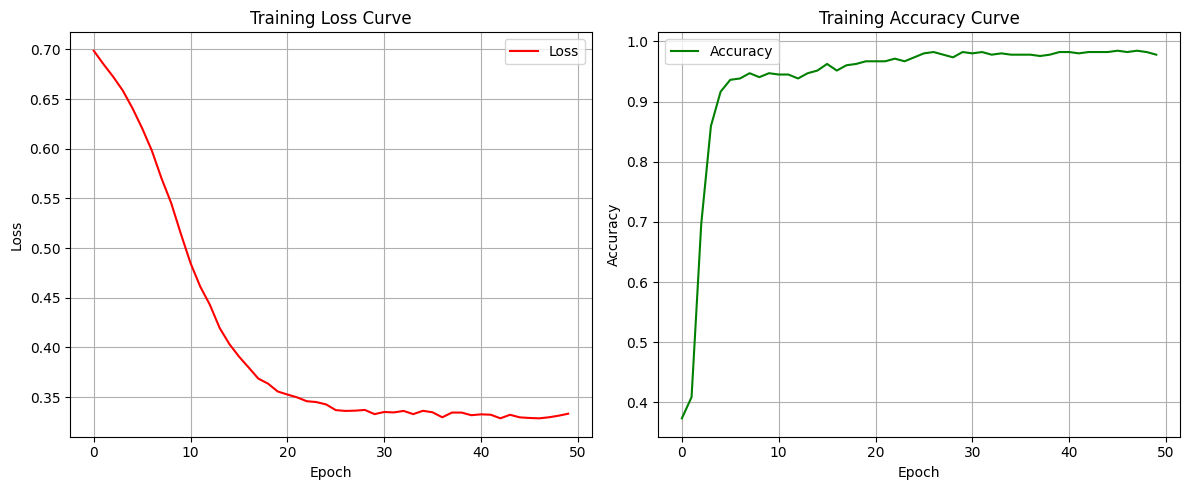

In [13]:
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(loss_values, label='Loss', color='red')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracy_values, label='Accuracy', color='green')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy Curve")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()